In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Particle size distributions
This script creates the particle size distribution demonstration figure.

In [2]:
DENSITY = 10

In [3]:
data = {"Cube edge length": [5, 10, 20, 40],
        "Number of particles": [512, 64, 8, 1]}
df = pd.DataFrame(data)
df["Total volume"] = df["Number of particles"] * df["Cube edge length"] ** 3
df["Weight fraction"] = df["Total volume"] / df["Total volume"].sum()
df["Number fraction"] = df["Number of particles"] / df["Number of particles"].sum()
df

,Cube edge length,Number of particles,Total volume,Weight fraction,Number fraction
0,5,512,64000,0.25,0.875214
1,10,64,64000,0.25,0.109402
2,20,8,64000,0.25,0.013675
3,40,1,64000,0.25,0.001709


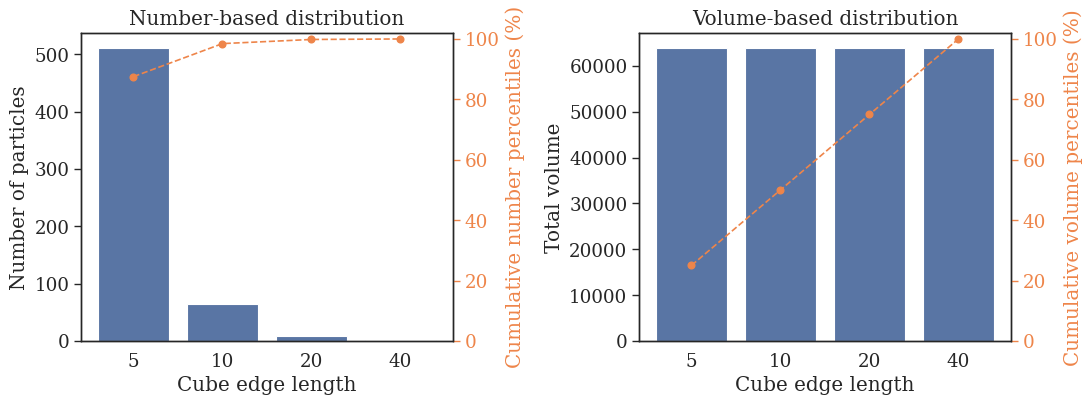

In [4]:
sns.set_theme("paper", "white", font_scale=1.5, font="serif")
pal = sns.color_palette("muted", 2)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.5)
sns.barplot(x="Cube edge length", y="Number of particles", data=df, ax=axs[0])
axs2 = axs[0].twinx()
axs2.plot([0, 1, 2, 3],
          np.cumsum(df["Number of particles"].values) / np.sum(df["Number of particles"]) * 100,
          '--o',
          color=pal[1])
axs2.set_ylim(0, 102)
axs2.set_ylabel("Cumulative number percentiles (%)")
axs2.yaxis.label.set_color(pal[1])
axs2.tick_params(axis='y', colors=pal[1])
axs[0].set_title("Number-based distribution")
sns.barplot(x="Cube edge length", y="Total volume", data=df, ax=axs[1])
axs2 = axs[1].twinx()
axs2.plot([0, 1, 2, 3],
          np.cumsum(df["Total volume"].values) / np.sum(df["Total volume"]) * 100,
          '--o',
          color=pal[1])
axs2.set_ylim(0, 102)
axs2.set_ylabel("Cumulative volume percentiles (%)")
axs2.yaxis.label.set_color(pal[1])
axs2.tick_params(axis='y', colors=pal[1])
axs[1].set_title("Volume-based distribution")
plt.savefig("../../05_Thesis/figures/Theory/sizeDistributionDemo", dpi=600, bbox_inches="tight")